<a href="https://colab.research.google.com/github/cahyaekapermana/chocolatefruitripeness_cnn/blob/main/proyek3_chocolatefruitripeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PS: Create your kaggle credentials then upload to your runtime before running the script since the data source is public kaggle datasets**


Koneksi ke kaggle dikarenakan dataset yang digunakan melalui kagle


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Download dan unzip dataset coklat dari kagle

In [ ]:
! kaggle datasets download juanfelipeheredia/cocoa-ripeness-dataset-tcs-01

 75% 33.0M/44.1M [00:00<00:00, 64.3MB/s]
100% 44.1M/44.1M [00:00<00:00, 69.4MB/s]


In [ ]:
!unzip cocoa-ripeness-dataset-tcs-01.zip

Archive:  cocoa-ripeness-dataset-tcs-01.zip
  inflating: Cocoa Ripeness Dataset/I1.jpg  
  inflating: Cocoa Ripeness Dataset/I10.jpg  
  inflating: Cocoa Ripeness Dataset/I100.jpg  
  inflating: Cocoa Ripeness Dataset/I101.jpg  
  inflating: Cocoa Ripeness Dataset/I102.jpg  
  inflating: Cocoa Ripeness Dataset/I103.jpg  
  inflating: Cocoa Ripeness Dataset/I104.jpg  
  inflating: Cocoa Ripeness Dataset/I105.jpg  
  inflating: Cocoa Ripeness Dataset/I106.jpg  
  inflating: Cocoa Ripeness Dataset/I107.jpg  
  inflating: Cocoa Ripeness Dataset/I108.jpg  
  inflating: Cocoa Ripeness Dataset/I109.jpg  
  inflating: Cocoa Ripeness Dataset/I11.jpg  
  inflating: Cocoa Ripeness Dataset/I110.jpg  
  inflating: Cocoa Ripeness Dataset/I111.jpg  
  inflating: Cocoa Ripeness Dataset/I112.jpg  
  inflating: Cocoa Ripeness Dataset/I113.jpg  
  inflating: Cocoa Ripeness Dataset/I114.jpg  
  inflating: Cocoa Ripeness Dataset/I115.jpg  
  inflating: Cocoa Ripeness Dataset/I116.jpg  
  inflating: Cocoa R

Import & pakai library yg diperlukan.

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Membuat folder bernama Cocoa Ripeness Dataset

In [ ]:
PATH = 'Cocoa Ripeness Dataset'
# membuat sub folder immature
immature_dir = os.path.join(PATH, 'immature')
os.makedirs(immature_dir)

In [ ]:
import fnmatch
import shutil
# memindah list gambar yang berawalan I pada dataset ke dalam folder immature
for file in os.listdir(PATH):
    if fnmatch.fnmatch(file, 'I*'):
        shutil.move(PATH+'/'+file, immature_dir+'/'+file)

In [ ]:
# membuat sub folder mature
mature_dir = os.path.join(PATH, 'mature')
os.makedirs(mature_dir)

In [ ]:
# memindah list gambar yang berawalan M pada dataset ke dalam folder mature
for file in os.listdir(PATH):
    if fnmatch.fnmatch(file, 'M*'):
        shutil.move(PATH+'/'+file, mature_dir+'/'+file)

In [ ]:
# membuat sub folder overmature
overmature_dir = os.path.join(PATH, 'overmature')
os.makedirs(overmature_dir)

In [ ]:
# memindah list gambar yang berawalan M pada dataset ke dalam folder mature
for file in os.listdir(PATH):
    if fnmatch.fnmatch(file, 'S*'):
        shutil.move(PATH+'/'+file, overmature_dir+'/'+file)

In [ ]:
y = ['immature','mature','overmature']

In [ ]:
dir_name = [immature_dir,mature_dir,overmature_dir]

**PS : split to 80 train 20 validation later**
> 
check files on runtime too(some error may occure)


In [ ]:
for i in y:
  os.makedirs(PATH +'/train/' + i)
  os.makedirs(PATH +'/test/' + i)
  source = PATH + '/' + i
  for x in dir_name:
    allFileNames = os.listdir(x)
    np.random.shuffle(allFileNames)
    test_ratio = 0.1
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]
    for name in train_FileNames:
      shutil.move(name, PATH +'/train/' + i)
    for name in test_FileNames:
      shutil.move(name, PATH +'/test/' + i)

In [ ]:
shutil.rmtree(mature_dir)
shutil.rmtree(immature_dir)
shutil.rmtree(overmature_dir)

In [ ]:
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 20

In [ ]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,)

train_data_gen = train_image_generator.flow_from_directory(train_dir, 
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           batch_size = batch_size,
                                                           class_mode = 'categorical')

test_data_gen = test_image_generator.flow_from_directory(test_dir,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         batch_size = batch_size,
                                                         shuffle = True)

Found 427 images belonging to 3 classes.
Found 49 images belonging to 3 classes.


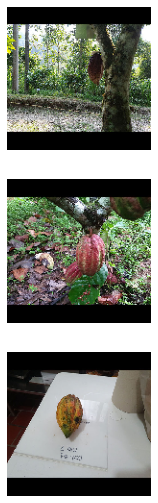

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    # else:
    #   for img, probability, ax in zip( images_arr, probabilities, axes):
    #       ax.imshow(img)
    #       ax.axis('off')
    #       if probability > 0.5:
    #           ax.set_title("%.2f" % (probability*100) + "% dog")
    #       else:
    #           ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:3])

In [ ]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                        horizontal_flip=True,
                                                                        rotation_range=30,
                                                                        width_shift_range=0.2,
                                                                        height_shift_range=0.2,
                                                                        shear_range=0.2,
                                                                        zoom_range=0.4,
                                                                        fill_mode="nearest"
                                                                        )

Found 427 images belonging to 3 classes.


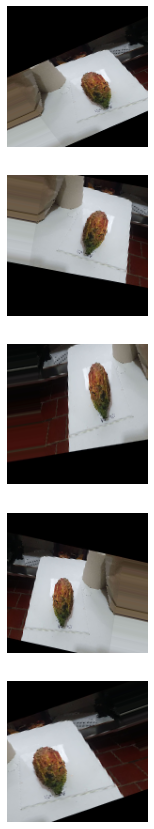

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

augmented_images = [train_data_gen[10][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
model = Sequential([
    Conv2D(128, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation='relu'),
    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2), padding = 'same'),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='softmax'),
    ])

model.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [ ]:
from keras.callbacks import EarlyStopping#set early stopping monitor so the model stops training when it won't improve anymore

early_stopping_monitor = EarlyStopping(patience=3)#train model

history = model.fit(
    train_data_gen,
    steps_per_epoch=15,
    epochs=5,
    validation_steps=7,
    callbacks=[early_stopping_monitor],
)

Epoch 1/5
15/15 [==============================] - 28s 2s/step - loss: 0.8943 - accuracy: 0.6511
Epoch 2/5
15/15 [==============================] - 28s 2s/step - loss: 0.7158 - accuracy: 0.6644
Epoch 3/5
15/15 [==============================] - 27s 2s/step - loss: 0.7233 - accuracy: 0.6887
Epoch 4/5
15/15 [==============================] - 28s 2s/step - loss: 0.6617 - accuracy: 0.7444
Epoch 5/5
15/15 [==============================] - 27s 2s/step - loss: 0.6310 - accuracy: 0.7863


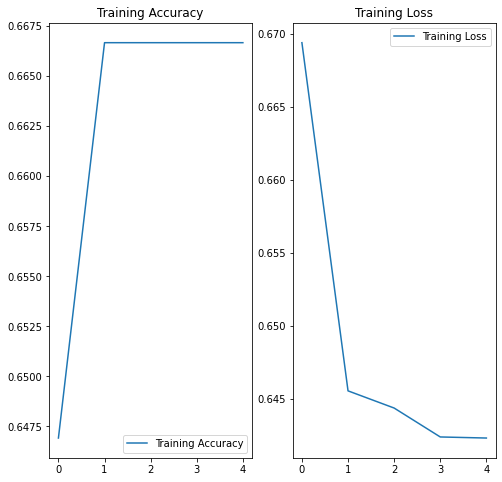

In [ ]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
augmented_images = [tte for i in range(5)]

plotImages(augmented_images)

In [ ]:
probabilities = model.predict(test_data_gen)
print(probabilities)

[[0.36297315]
 [0.37447006]
 [0.36769116]
 [0.3579207 ]
 [0.3750812 ]
 [0.36921003]
 [0.36813223]
 [0.36245948]
 [0.371803  ]
 [0.3602086 ]
 [0.3586126 ]
 [0.36306912]
 [0.37186724]
 [0.36585724]
 [0.37565112]
 [0.35597497]
 [0.36999524]
 [0.35797712]
 [0.37225223]
 [0.36051297]
 [0.36201903]
 [0.37237424]
 [0.35888195]
 [0.3661772 ]
 [0.37275046]
 [0.35993642]
 [0.36874306]
 [0.376629  ]
 [0.38028967]
 [0.37364683]
 [0.36920717]
 [0.36447197]
 [0.37372464]
 [0.36143517]
 [0.37679788]
 [0.37987164]
 [0.37081593]
 [0.3803206 ]
 [0.3789737 ]
 [0.37901822]
 [0.38010514]
 [0.37798786]
 [0.37985203]
 [0.37454757]
 [0.37169164]
 [0.3691607 ]
 [0.36757046]
 [0.37293884]
 [0.37449795]]
